# Student Academic Risk & Intervention Analytics Model

In [25]:
# importing the needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [16]:
# loading the data

train_data = pd.read_csv('../data/train.csv')
val_data = pd.read_csv('../data/validation.csv')
test_data = pd.read_csv('../data/test.csv')

print(f"Training Data Rows - {train_data.shape[0]} : Training Data Columns - {train_data.shape[1]}")
print(f"Validation Data Rows - {val_data.shape[0]} : Validation Data Columns - {val_data.shape[1]}")
print(f"Testing Data Rows - {test_data.shape[0]} : Testing Data Columns - {test_data.shape[1]}")

Training Data Rows - 8000774 : Training Data Columns - 21
Validation Data Rows - 999229 : Validation Data Columns - 21
Testing Data Rows - 999997 : Testing Data Columns - 21


In [15]:
# checking the data types
train_data.dtypes

Age                    int64
Grade                  int64
Gender                object
Race                  object
SES_Quartile           int64
ParentalEducation     object
SchoolType            object
Locale                object
TestScore_Math       float64
TestScore_Reading    float64
TestScore_Science    float64
GPA                  float64
AttendanceRate       float64
StudyHours           float64
InternetAccess         int64
Extracurricular        int64
PartTimeJob            int64
ParentSupport          int64
Romantic               int64
FreeTime               int64
GoOut                  int64
dtype: object

In [27]:
# List of columns to convert to categorical based on dataset description
categorical_int_cols = [
    'SES_Quartile',
    'InternetAccess',
    'Extracurricular',
    'PartTimeJob',
    'ParentSupport',
    'Romantic',
    'FreeTime',
    'GoOut',
    'Age',
    'Grade'
]

# Convert to 'category' dtype
for col in categorical_int_cols:
    train_data[col] = train_data[col].astype('category')

# Confirm conversion
train_data[categorical_int_cols].dtypes

SES_Quartile       category
InternetAccess     category
Extracurricular    category
PartTimeJob        category
ParentSupport      category
Romantic           category
FreeTime           category
GoOut              category
Age                category
Grade              category
dtype: object

In [ ]:
# Validation data
for col in categorical_int_cols:
    val_data[col] = val_data[col].astype('category')

# Confirm conversion
val_data[categorical_int_cols].dtypes

SES_Quartile       category
InternetAccess     category
Extracurricular    category
PartTimeJob        category
ParentSupport      category
Romantic           category
FreeTime           category
GoOut              category
Age                category
Grade              category
dtype: object

In [31]:
# Testing data
for col in categorical_int_cols:
    test_data[col] = test_data[col].astype('category')

# Confirm conversion
test_data[categorical_int_cols].dtypes

SES_Quartile       category
InternetAccess     category
Extracurricular    category
PartTimeJob        category
ParentSupport      category
Romantic           category
FreeTime           category
GoOut              category
Age                category
Grade              category
dtype: object

In [10]:
# checking for missing values

print(f"Training Data Missing Values: \n{train_data.isna().sum()}")

Training Data Missing Values: 
Age                  0
Grade                0
Gender               0
Race                 0
SES_Quartile         0
ParentalEducation    0
SchoolType           0
Locale               0
TestScore_Math       0
TestScore_Reading    0
TestScore_Science    0
GPA                  0
AttendanceRate       0
StudyHours           0
InternetAccess       0
Extracurricular      0
PartTimeJob          0
ParentSupport        0
Romantic             0
FreeTime             0
GoOut                0
dtype: int64


In [12]:
print(f"Validation Data Missing Values: \n{val_data.isna().sum()}")

Validation Data Missing Values: 
Age                  0
Grade                0
Gender               0
Race                 0
SES_Quartile         0
ParentalEducation    0
SchoolType           0
Locale               0
TestScore_Math       0
TestScore_Reading    0
TestScore_Science    0
GPA                  0
AttendanceRate       0
StudyHours           0
InternetAccess       0
Extracurricular      0
PartTimeJob          0
ParentSupport        0
Romantic             0
FreeTime             0
GoOut                0
dtype: int64


In [13]:
print(f"Testing Data Missing Values: \n{test_data.isna().sum()}")

Testing Data Missing Values: 
Age                  0
Grade                0
Gender               0
Race                 0
SES_Quartile         0
ParentalEducation    0
SchoolType           0
Locale               0
TestScore_Math       0
TestScore_Reading    0
TestScore_Science    0
GPA                  0
AttendanceRate       0
StudyHours           0
InternetAccess       0
Extracurricular      0
PartTimeJob          0
ParentSupport        0
Romantic             0
FreeTime             0
GoOut                0
dtype: int64


### Summary statistics - Distribution of the Data

In [ ]:
# let's get a summary of the dataset - both numerical and categorical

# =========================== training data ===========================
train_data.describe()

,TestScore_Math,TestScore_Reading,TestScore_Science,GPA,AttendanceRate,StudyHours
count,8.000774e+06,8.000774e+06,8.000774e+06,8.000774e+06,8.000774e+06,8.000774e+06
mean,7.497554e+01,7.497894e+01,7.497851e+01,2.996743e+00,8.995891e-01,9.997262e-01
std,9.944944e+00,9.943306e+00,9.948554e+00,4.595127e-01,4.806154e-02,3.481091e-01
min,2.257681e+01,2.118797e+01,1.918883e+01,7.131814e-01,7.000000e-01,0.000000e+00
25%,6.824699e+01,6.825267e+01,6.825523e+01,2.685036e+00,8.669519e-01,7.642085e-01
50%,7.499531e+01,7.500211e+01,7.500176e+01,2.999824e+00,8.999776e-01,9.998944e-01
75%,8.174198e+01,8.174334e+01,8.174174e+01,3.314440e+00,9.330400e-01,1.235127e+00
max,1.000000e+02,1.000000e+02,1.000000e+02,4.000000e+00,1.000000e+00,2.793829e+00


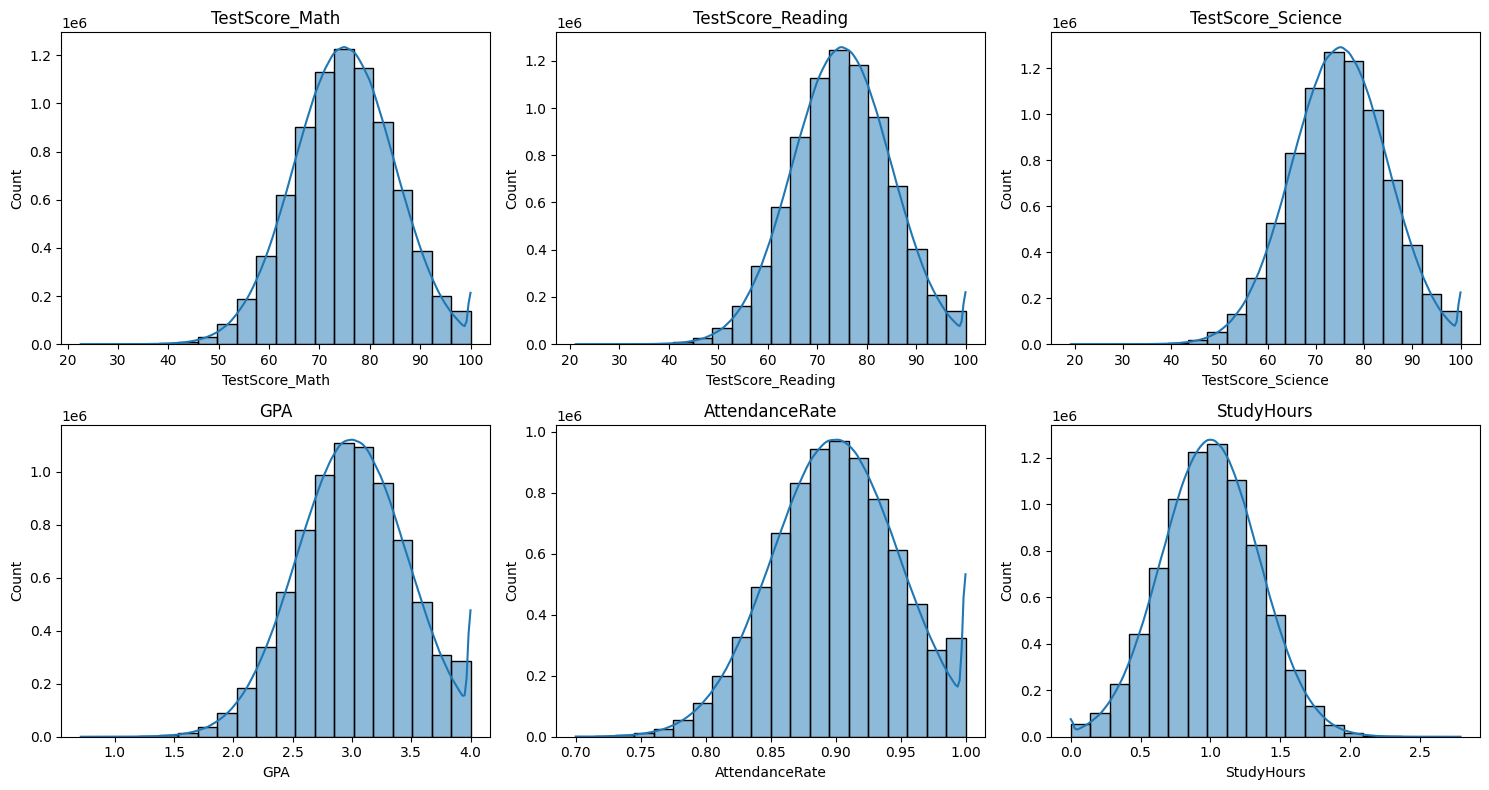

In [29]:
numeric_cols = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

num_cols = numeric_cols.copy()
n_cols = 3  # Number of columns in the figure
n_rows = math.ceil(len(num_cols) / n_cols)

plt.figure(figsize=(5*n_cols, 4*n_rows))
for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.histplot(train_data[col], kde=True, bins=20)
    plt.title(col)
plt.tight_layout()
plt.show()

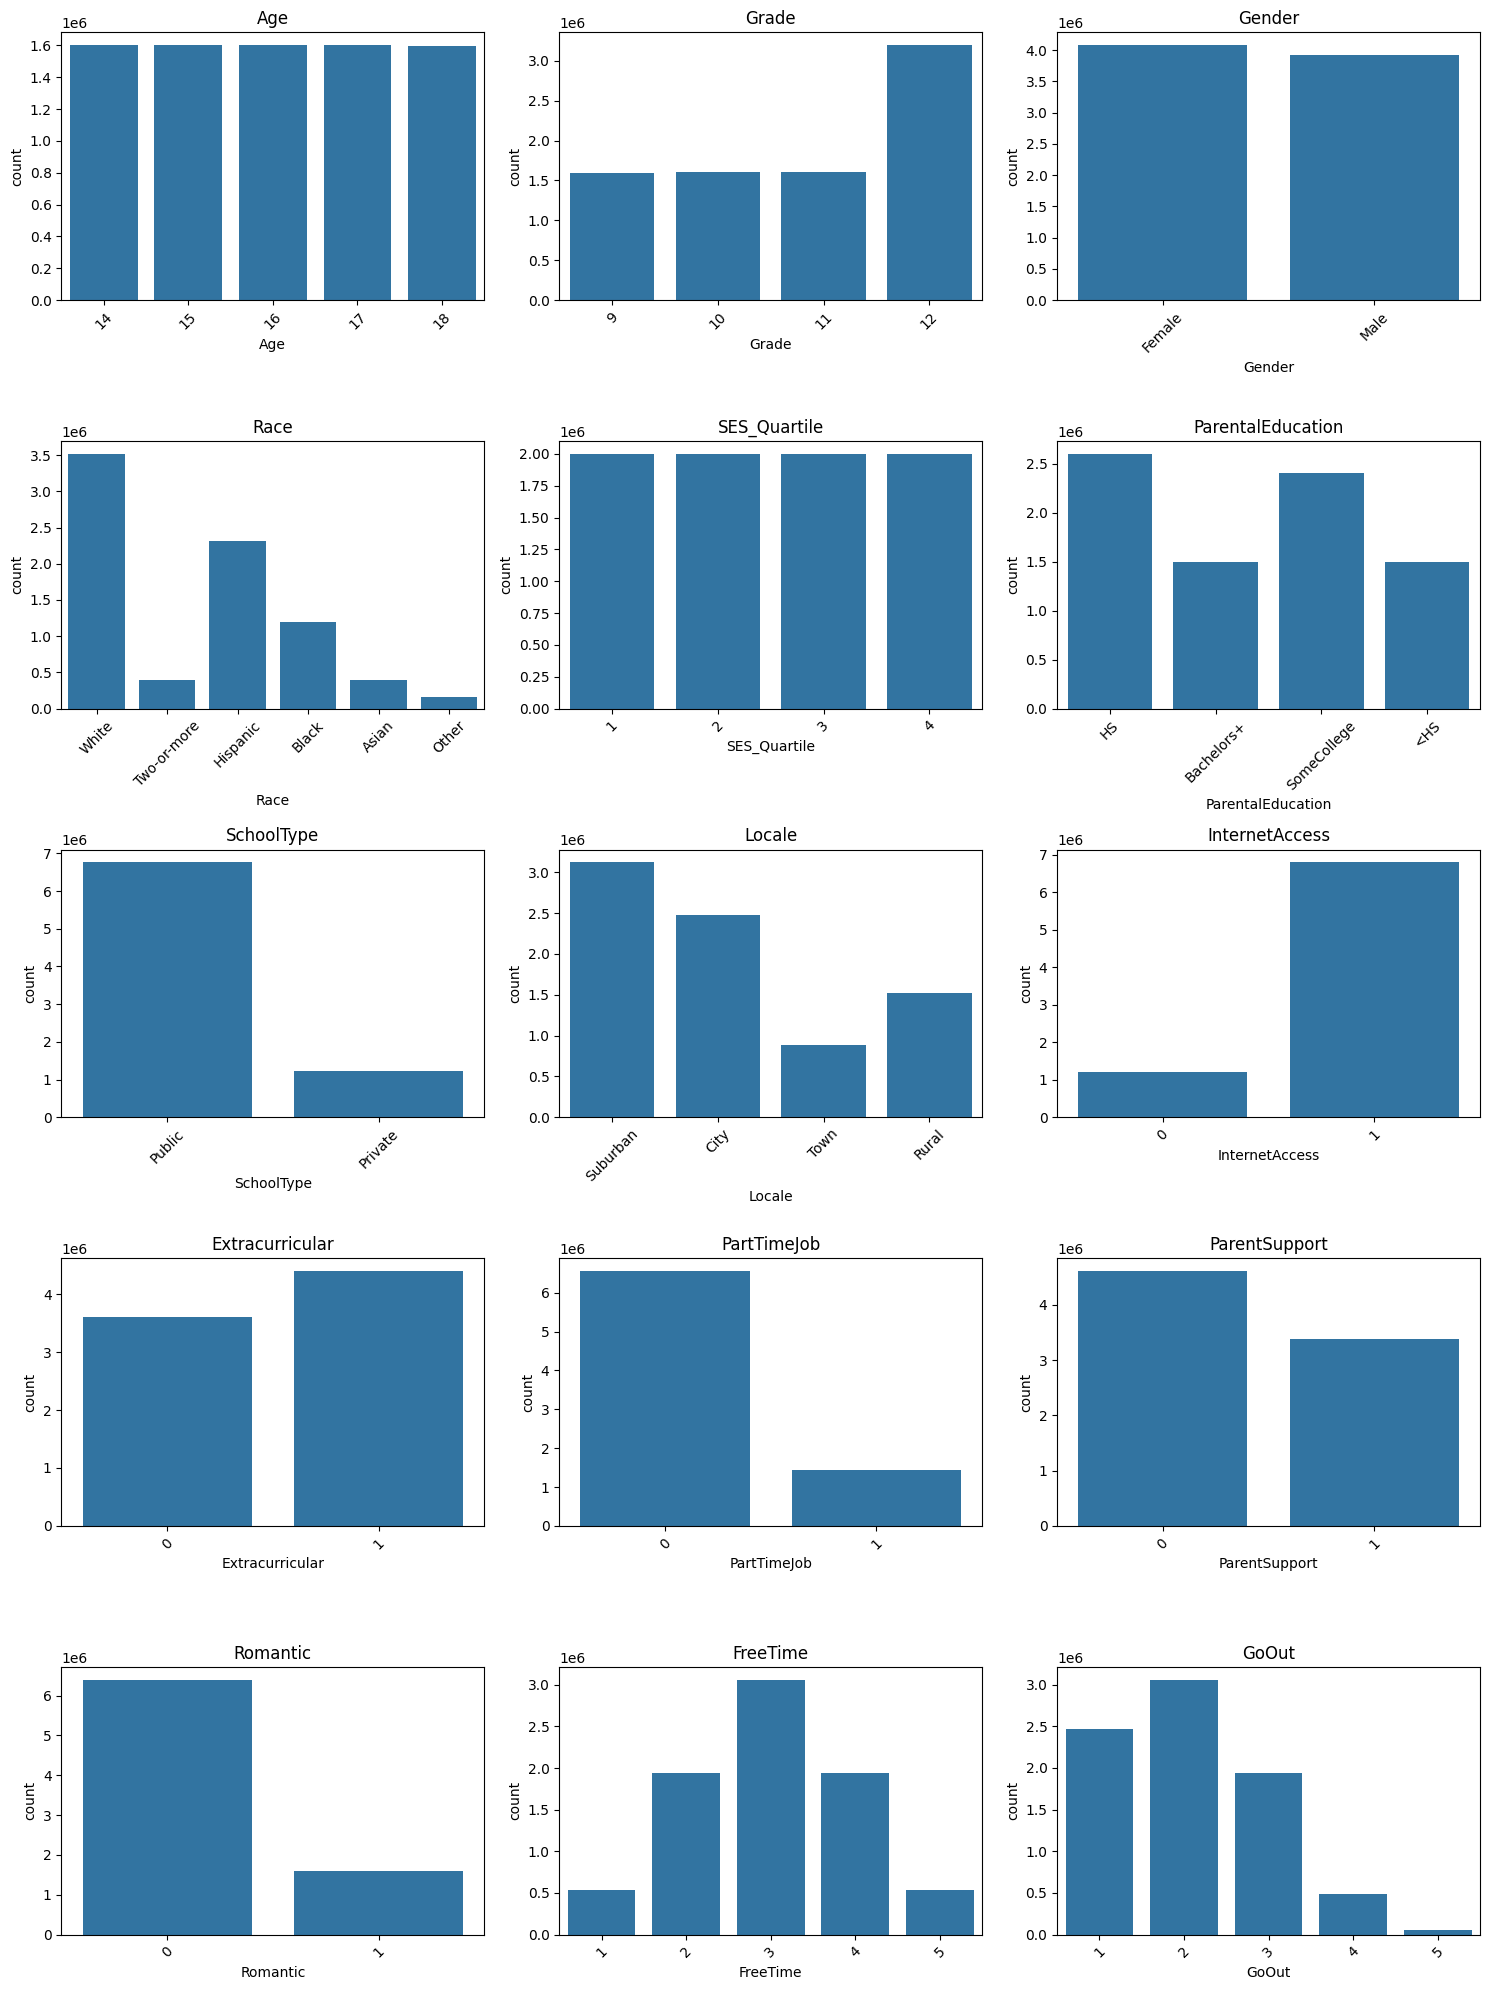

In [33]:
categorical_cols = train_data.select_dtypes(include=['object', 'category']).columns.tolist()

cat_cols = categorical_cols.copy()
n_cols = 3
n_rows = math.ceil(len(cat_cols)/n_cols)

plt.figure(figsize=(5*n_cols, 4*n_rows))
for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.countplot(data=train_data, x=col)
    plt.xticks(rotation=45)
    plt.title(col)
plt.tight_layout()
plt.show()


In [34]:
# =========================== validation data ===========================
val_data.describe()

,TestScore_Math,TestScore_Reading,TestScore_Science,GPA,AttendanceRate,StudyHours
count,999229.000000,999229.000000,999229.000000,999229.000000,999229.000000,999229.000000
mean,74.969348,74.986900,74.980436,2.996990,0.899570,1.000338
std,9.953549,9.942880,9.952319,0.459929,0.048066,0.348139
min,24.956829,26.877302,27.577756,0.859093,0.700000,0.000000
25%,68.231973,68.258701,68.254205,2.685326,0.866895,0.764862
50%,75.001566,75.003040,74.997514,3.000378,0.899966,1.000138
75%,81.740958,81.745880,81.752702,3.314793,0.933054,1.235797
max,100.000000,100.000000,100.000000,4.000000,1.000000,2.801384


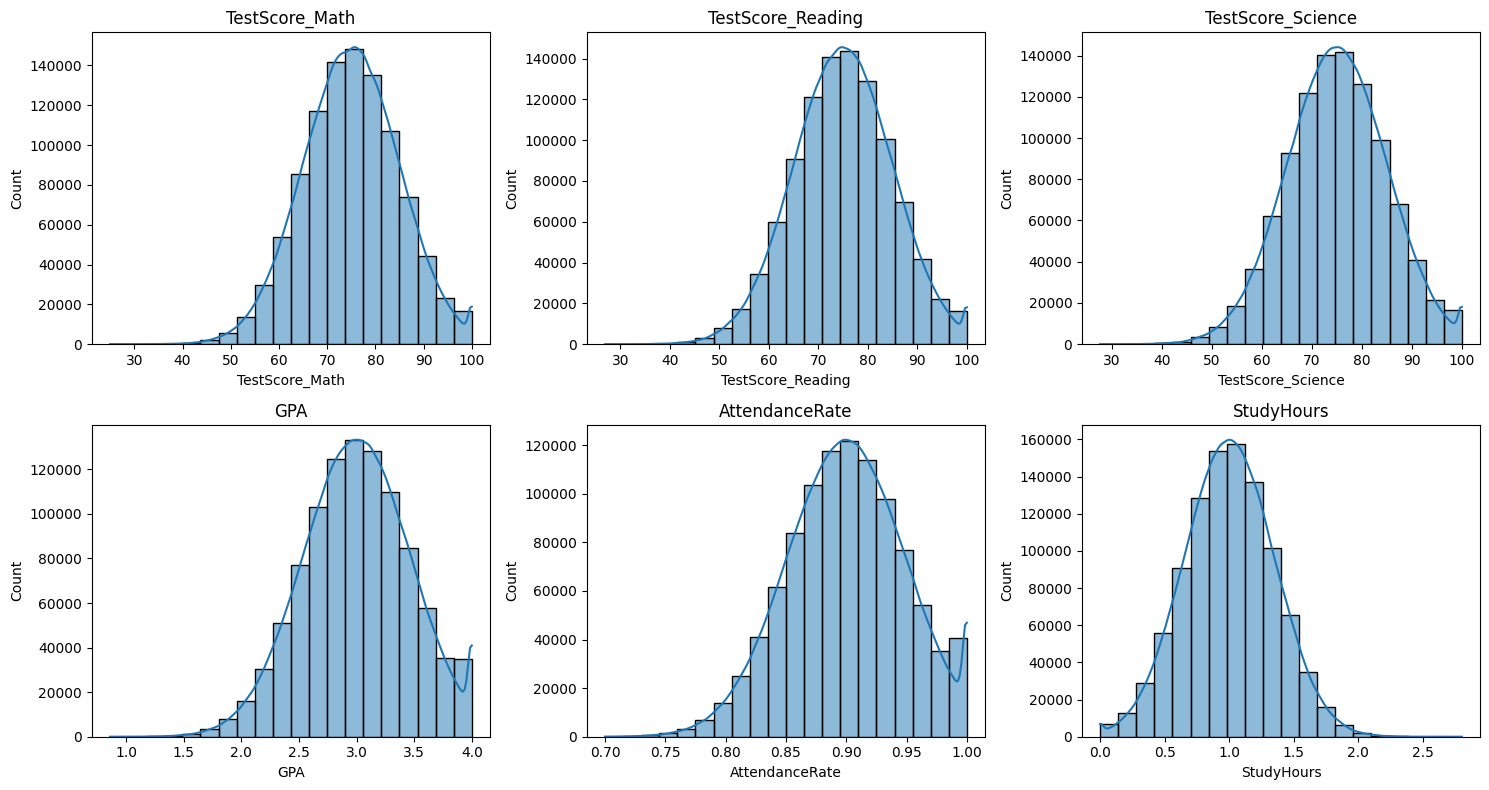

In [35]:
numeric_cols = val_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

num_cols = numeric_cols.copy()
n_cols = 3  # Number of columns in the figure
n_rows = math.ceil(len(num_cols) / n_cols)

plt.figure(figsize=(5*n_cols, 4*n_rows))
for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.histplot(val_data[col], kde=True, bins=20)
    plt.title(col)
plt.tight_layout()
plt.show()

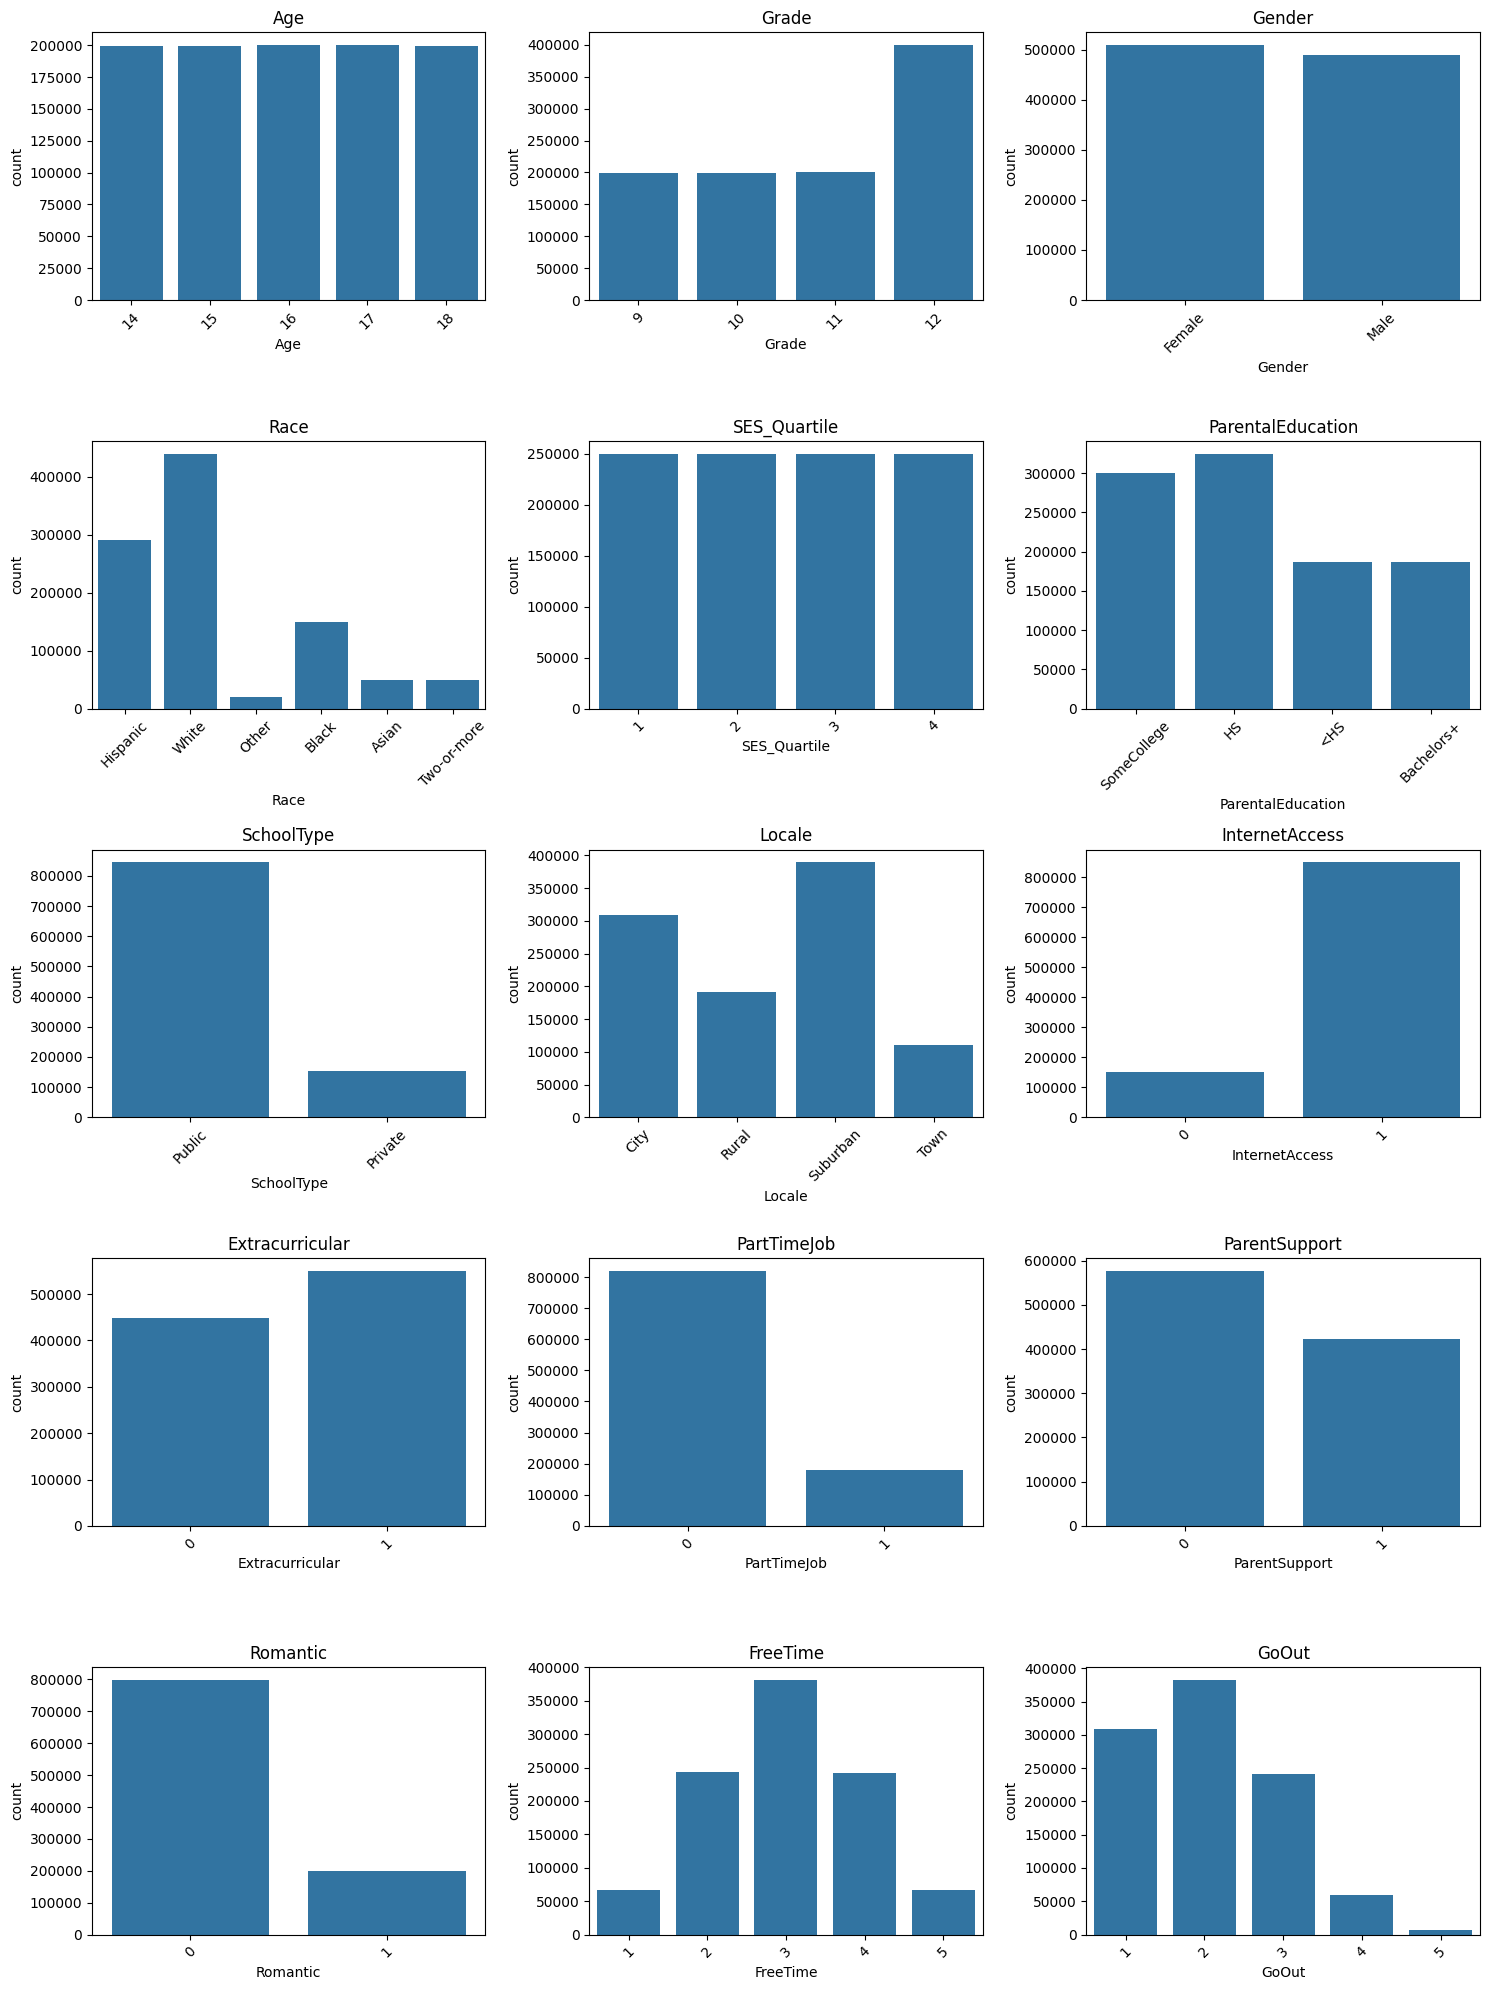

In [36]:
categorical_cols = val_data.select_dtypes(include=['object', 'category']).columns.tolist()

cat_cols = categorical_cols.copy()
n_cols = 3
n_rows = math.ceil(len(cat_cols)/n_cols)

plt.figure(figsize=(5*n_cols, 4*n_rows))
for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.countplot(data=val_data, x=col)
    plt.xticks(rotation=45)
    plt.title(col)
plt.tight_layout()
plt.show()


### Correlation Analysis

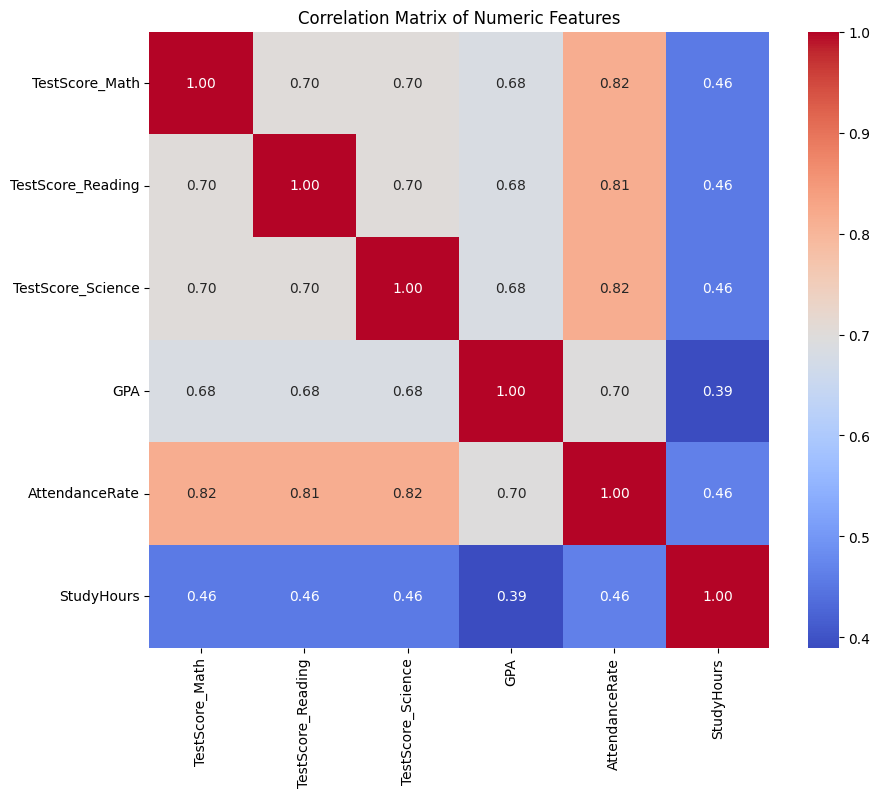

In [37]:
# Correlation matrix for numerical features
corr = train_data[numeric_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

In [46]:
train_data.sample(n=10)

,Age,Grade,Gender,Race,SES_Quartile,ParentalEducation,SchoolType,Locale,TestScore_Math,TestScore_Reading,...,GPA,AttendanceRate,StudyHours,InternetAccess,Extracurricular,PartTimeJob,ParentSupport,Romantic,FreeTime,GoOut
7992133,15,10,Female,Hispanic,4,Bachelors+,Public,City,81.053256,82.448206,...,2.890315,0.961316,1.238497,1,1,0,1,1,3,1
6547146,17,12,Female,Hispanic,3,HS,Public,Suburban,73.787844,78.698550,...,2.944303,0.925453,0.647861,0,0,0,1,0,2,2
2969835,15,10,Female,Black,1,HS,Public,City,62.808378,71.326259,...,2.334592,0.817899,1.077346,0,1,0,1,0,3,2
7574682,15,10,Male,Black,4,SomeCollege,Public,Rural,81.114589,72.078771,...,2.733070,0.887950,0.752645,1,0,0,1,0,4,1
5406220,15,10,Male,Hispanic,4,SomeCollege,Private,Town,57.235832,65.094289,...,2.430359,0.853892,0.261996,1,0,1,1,0,2,3
7759461,17,12,Female,White,1,HS,Public,Town,78.670526,75.470433,...,3.202656,0.874942,0.448335,1,1,1,0,1,3,1
7778128,16,11,Female,White,1,HS,Public,Suburban,79.595710,56.288763,...,2.471894,0.834235,0.941055,0,0,0,0,1,3,3
1130347,16,11,Male,White,1,<HS,Public,City,72.935706,67.296036,...,2.569741,0.920038,0.089409,0,0,0,1,0,5,3
2579650,16,11,Female,Hispanic,2,HS,Private,Rural,68.199744,68.161508,...,2.455672,0.859557,0.691383,0,0,0,0,0,1,3
6869103,17,12,Male,Black,3,SomeCollege,Public,Suburban,75.908713,73.062167,...,2.596996,0.890446,0.712783,1,0,1,1,0,3,3


This notebook focuses on exploratory and statistical analysis of the training, validation, and test datasets to understand their structure, feature distributions, and relationships. The insights gained here are used to make informed and justified decisions about feature types, target definition, preprocessing steps, and modeling choices in the subsequent implementation pipeline. Having explored the data, the downstream pipeline is designed with explicit assumptions rather than ad-hoc discovery, ensuring reproducibility and preventing data leakage.